# athome | 空き家バンク データ前処理〜可視化〜スプシ書き込み

> データ確認

In [19]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

In [20]:
# データ読み込み
df = pd.read_csv('athome空き家バンク_和歌山_出力データ.csv')
df.head()

,HomePrice,HomeSpace,HomeArea,LandArea,PrivateArea,HomeCategry,HomeYear,HomePlace,HomePaciffic
0,1480.0,4LDK,150.66,262.97,NaN,売戸建,1996-08-01,和歌山県紀の川市粉河,ＪＲ和歌山線 粉河駅 / 車4分
1,180.0,10DK,145.11,533.91,NaN,売戸建,1962-01-01,和歌山県紀の川市高野,ＪＲ和歌山線 打田駅 / 車12分
2,130.0,3DK,52.16,79.61,NaN,売戸建,1974-11-01,和歌山県紀の川市東国分,ＪＲ和歌山線 下井阪駅 / 車3分
3,600.0,5DK,125.44,105.88,NaN,売戸建,1975-08-01,和歌山県和歌山市紀三井寺,ＪＲ紀勢本線 紀三井寺駅 / 徒歩8分
4,300.0,4DK,55.89,79.92,NaN,売戸建,NaN,和歌山県紀の川市貴志川町鳥居,和歌山電鐵貴志川線 甘露寺前駅 / 車2分


In [21]:
# データ型確認
df.dtypes

HomePrice       float64
HomeSpace        object
HomeArea        float64
LandArea        float64
PrivateArea     float64
HomeCategry      object
HomeYear         object
HomePlace        object
HomePaciffic     object
dtype: object

In [22]:
# カラム名変更
columns = [
    '物件価格', '間取', '建物面積', '土地面積', '私有地面積',
    '分類', '築年月', '物件住所', 'アクセス'
]
df.columns = columns

In [23]:
# 欠損値確認
print(df.isnull().sum())

物件価格      3
間取        0
建物面積      4
土地面積      6
私有地面積    45
分類        0
築年月      19
物件住所      0
アクセス      0
dtype: int64


In [24]:
# 統計量計算 数値データ
df.describe()

,物件価格,建物面積,土地面積,私有地面積
count,42.000000,41.000000,39.000000,0.0
mean,550.714286,116.213415,319.025641,NaN
std,440.998827,67.502578,253.236941,NaN
min,130.000000,42.000000,26.460000,NaN
25%,280.000000,71.070000,126.390000,NaN
50%,415.000000,111.560000,262.970000,NaN
75%,775.000000,142.450000,437.505000,NaN
max,2400.000000,397.000000,1149.760000,NaN


In [25]:
# 統計量計算　文字列データ
df.describe(include=['O'])

,間取,分類,築年月,物件住所,アクセス
count,45,45,26,45,45
unique,20,1,22,39,45
top,6DK,売戸建,1965-01-01,和歌山県有田郡広川町大字広,ＪＲ和歌山線 粉河駅 / 車4分
freq,6,45,3,3,1


In [30]:
# 出現回数をカウント
df2 = df[['間取']]

# 値の出現回数
for c in list(df2.columns):
    print(c)
    print(df[c].value_counts())
    print()

間取
6DK      6
3DK      5
5DK      5
4DK      4
4LDK     3
不明       2
6LDK     2
5LDK     2
7K       2
7DK      2
4K       2
3K       2
4SK      1
6SLDK    1
1DK      1
5K       1
9DK      1
10DK     1
9K       1
8K       1
Name: 間取, dtype: int64



>データ可視化

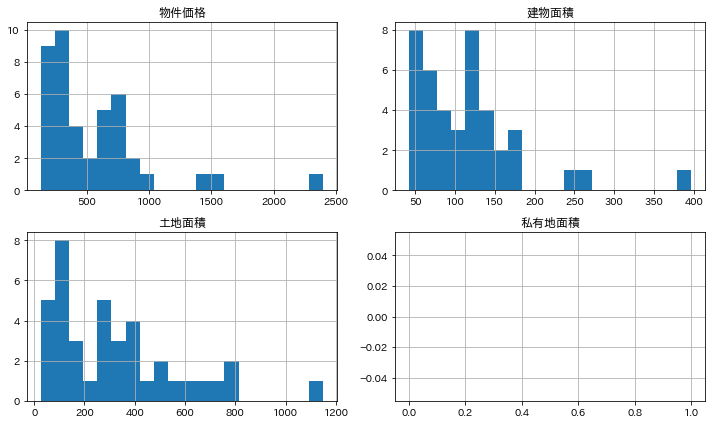

In [37]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

# データフレームの数値項目でヒストグラム表示.
# ヒストグラムはデータの分布を確認するのに便利です。
df.hist(bins=20, layout=(2,2))
plt.tight_layout()
plt.show()

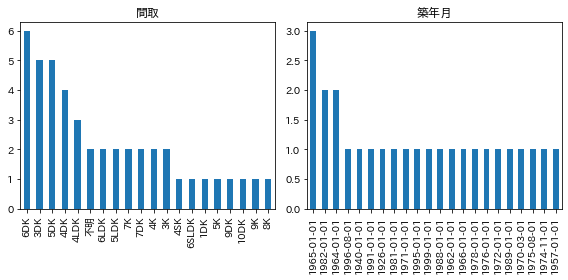

In [34]:
plt.rcParams['figure.figsize'] = (8, 4)

# 非数値項目の度数分布
df2 = df[['間取', '築年月']]

for i, c in enumerate(df2.columns):
    ax = plt.subplot(1, 2, i+1)
    df2[c].value_counts().plot(
        kind='bar', title=c, ax=ax)    

# レイアウトの調整    
plt.tight_layout()
plt.show()

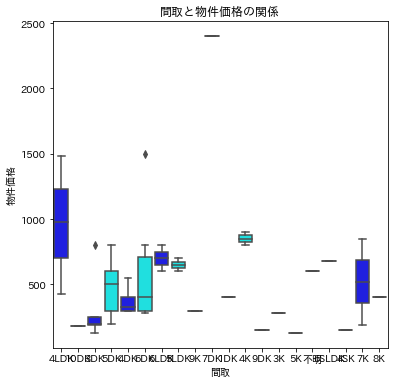

In [35]:
plt.rcParams['figure.figsize'] = (6, 6)

# 箱ひげ図の描画
sns.boxplot(
    x='間取', y='物件価格', data=df, 
    palette=['blue', 'cyan'])
plt.title('間取と物件価格の関係')
plt.show()

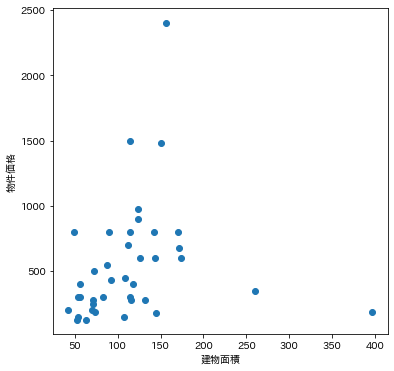

In [36]:
plt.scatter(
    x='建物面積', y='物件価格', data=df) # 用意したxとyの配列をplt.scatter(x軸の値, y軸の値)として代入
plt.xlabel("建物面積") # x軸のラベルを設定
plt.ylabel("物件価格") # y軸のラベルを設定
plt.show()

> データ前処理

In [41]:
# 私有地面積と分類列を削除
df_main = df[['物件価格', '間取', '建物面積', '土地面積', '築年月', '物件住所', 'アクセス']]
df_main.head()

,物件価格,間取,建物面積,土地面積,築年月,物件住所,アクセス
0,1480.0,4LDK,150.66,262.97,1996-08-01,和歌山県紀の川市粉河,ＪＲ和歌山線 粉河駅 / 車4分
1,180.0,10DK,145.11,533.91,1962-01-01,和歌山県紀の川市高野,ＪＲ和歌山線 打田駅 / 車12分
2,130.0,3DK,52.16,79.61,1974-11-01,和歌山県紀の川市東国分,ＪＲ和歌山線 下井阪駅 / 車3分
3,600.0,5DK,125.44,105.88,1975-08-01,和歌山県和歌山市紀三井寺,ＪＲ紀勢本線 紀三井寺駅 / 徒歩8分
4,300.0,4DK,55.89,79.92,NaN,和歌山県紀の川市貴志川町鳥居,和歌山電鐵貴志川線 甘露寺前駅 / 車2分


In [42]:
# 中央値で欠損補完
df_filled = df_main.fillna(df.median())
df_filled.head()

/var/folders/_f/wnnh_7vx6knb7ssvxrg426vr0000gn/T/ipykernel_28107/1436080343.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_filled = df_main.fillna(df.median())


,物件価格,間取,建物面積,土地面積,築年月,物件住所,アクセス
0,1480.0,4LDK,150.66,262.97,1996-08-01,和歌山県紀の川市粉河,ＪＲ和歌山線 粉河駅 / 車4分
1,180.0,10DK,145.11,533.91,1962-01-01,和歌山県紀の川市高野,ＪＲ和歌山線 打田駅 / 車12分
2,130.0,3DK,52.16,79.61,1974-11-01,和歌山県紀の川市東国分,ＪＲ和歌山線 下井阪駅 / 車3分
3,600.0,5DK,125.44,105.88,1975-08-01,和歌山県和歌山市紀三井寺,ＪＲ紀勢本線 紀三井寺駅 / 徒歩8分
4,300.0,4DK,55.89,79.92,NaN,和歌山県紀の川市貴志川町鳥居,和歌山電鐵貴志川線 甘露寺前駅 / 車2分


In [29]:
# ダミー変数化
dummy_df = pd.get_dummies(df_filled['間取'])
df_filled_dummy = pd.concat([df_filled, dummy_df], axis=1)
df_filled_dummy = df_filled_dummy.drop('間取', axis=1)
df_filled_dummy.head()

,物件価格,建物面積,土地面積,築年月,物件住所,アクセス,10DK,1DK,3DK,3K,...,5LDK,6DK,6LDK,6SLDK,7DK,7K,8K,9DK,9K,不明
0,1480.0,150.66,262.97,1996-08-01,和歌山県紀の川市粉河,ＪＲ和歌山線 粉河駅 / 車4分,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,180.0,145.11,533.91,1962-01-01,和歌山県紀の川市高野,ＪＲ和歌山線 打田駅 / 車12分,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,130.0,52.16,79.61,1974-11-01,和歌山県紀の川市東国分,ＪＲ和歌山線 下井阪駅 / 車3分,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,600.0,125.44,105.88,1975-08-01,和歌山県和歌山市紀三井寺,ＪＲ紀勢本線 紀三井寺駅 / 徒歩8分,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,300.0,55.89,79.92,NaN,和歌山県紀の川市貴志川町鳥居,和歌山電鐵貴志川線 甘露寺前駅 / 車2分,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> スプレッドシート書き込み

In [55]:
import gspread
from google.oauth2.service_account import Credentials
from gspread_dataframe import get_as_dataframe, set_with_dataframe
# お決まりの文句
# 2つのAPIを記述しないとリフレッシュトークンを3600秒毎に発行し続けなければならない
scope = ['https://www.googleapis.com/auth/spreadsheets','https://www.googleapis.com/auth/drive']
#ダウンロードしたjsonファイル名をクレデンシャル変数に設定。
credentials = Credentials.from_service_account_file("gspread-test-398911-67baa083124f.json", scopes=scope)
#OAuth2の資格情報を使用してGoogle APIにログイン。
gc = gspread.authorize(credentials)
#スプレッドシートIDを変数に格納する。
SPREADSHEET_KEY = '1rcsYIABOTLQNM6WQx5Ao9rl6DmqOpt_hX5MehdVO3IE'

In [56]:
# スプレッドシート（ブック）を開く
workbook = gc.open_by_key(SPREADSHEET_KEY)
# シートを開く
worksheet = workbook.worksheet('シート1')

[Python] Googleスプレッドシートのデータをpandas DataFrameで読み込み、書き込みを行う  
参考URL：https://note.com/kohaku935/n/ne048969e4617

In [57]:
# データを指定したシートに書き込む
set_with_dataframe(worksheet, df_filled_dummy, row=1, col=1)